In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import keras
from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense        # importing Dense layers
from scikeras.wrappers import KerasClassifier

In [78]:
# data = pd.read_csv("csv/walk.csv",index_col=False)
# encode = {'<40': 0, '>40': 1}

# X = data[["r_hip_ang", "r_knee_ang", "r_ankle_ang", "r_elbow_ang", "r_shoulder_ang",
#         "r_hip_vel", "r_knee_vel", "r_ankle_vel", "r_elbow_vel", "r_shoulder_vel",
#         "r_hip_accel", "r_knee_accel", "r_ankle_accel", "r_elbow_accel", "r_shoulder_accel"]]
# #X = data.drop(['id','gender','age'], axis=1)
# y = data['age'].map(encode)
# X  = preprocessing.scale(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [79]:
data = pd.read_csv("csv/walk.csv",index_col=False)
encode = {'<40': 0, '>40': 1}

X = data.loc[data['id'].isin([2,3,4,5])] # 1,4 and 2,5 huge loss
# X_train = X [["r_hip_ang", "r_knee_ang", "r_ankle_ang", "r_elbow_ang", "r_shoulder_ang",
#         "r_hip_vel", "r_knee_vel", "r_ankle_vel", "r_elbow_vel", "r_shoulder_vel",
#         "r_hip_accel", "r_knee_accel", "r_ankle_accel", "r_elbow_accel", "r_shoulder_accel"]]
X_train = X.drop(['id','gender','age'],axis=1)
#X_train = X_train.sample(frac = 1)
X_train = preprocessing.scale(X_train)
y_train = X['age'].map(encode)


X2 = data.loc[data['id'].isin([1,10])]
# X_test = X2 [["r_hip_ang", "r_knee_ang", "r_ankle_ang", "r_elbow_ang", "r_shoulder_ang",
#         "r_hip_vel", "r_knee_vel", "r_ankle_vel", "r_elbow_vel", "r_shoulder_vel",
#         "r_hip_accel", "r_knee_accel", "r_ankle_accel", "r_elbow_accel", "r_shoulder_accel"]]
X_test = X2.drop(['id','gender','age'],axis=1)
#X_test = X_test.sample(frac = 1)
X_test = preprocessing.scale(X_test)
y_test = X2['age'].map(encode)


In [88]:
def create_model():
    # declaring model
    basic_model = Sequential()

    # Adding layers to the model
    # First layers: 16 neurons/perceptrons that takes the input and uses 'sigmoid' activation function.
    basic_model.add(Dense(units = 64, activation = 'relu', input_shape = (46,))) #32 16 16 best for Train 1,2,4,5 & Test 3,6,7
    #basic_model.add(Dense(units = 64, actiation = 'relu')) 
    # basic_model.add(Dense(units = 16, activation = 'relu')) 

    # Second layer: 1 neuron/perceptron that takes the input from the 1st layers and gives output as 0 or 1.Activation used is 'Hard Sigmoid'
    basic_model.add(Dense(1, activation = 'sigmoid'))

    return basic_model

# compiling the model
basic_model = create_model()
#sgd = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9, nesterov=True)
basic_model.compile(loss = 'binary_crossentropy', optimizer = 'Nadam', metrics = ['accuracy'])
     

In [81]:
# # GridSearch stuff

# from sklearn.model_selection import GridSearchCV

# model = KerasClassifier(model=create_model, loss="binary_crossentropy", epochs=100, batch_size=50, verbose=0)
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# # current results: Nadam 2 
# param_grid = dict(optimizer=optimizer)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [87]:
# training the model
history = basic_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=50)
# history = basic_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=50) #BEST
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

Epoch 1/100
413/413 [==============================] - 2s 2ms/step - loss: 0.4702 - accuracy: 0.7949 - val_loss: 1.6030 - val_accuracy: 0.0850
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8528 - val_loss: 1.4484 - val_accuracy: 0.1627
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8659 - val_loss: 1.3934 - val_accuracy: 0.2178
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.8749 - val_loss: 1.3753 - val_accuracy: 0.2542
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 0.2986 - accuracy: 0.8805 - val_loss: 1.2968 - val_accuracy: 0.2807
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 0.2835 - accuracy: 0.8847 - val_loss: 1.3811 - val_accuracy: 0.2670
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 0.2714 - accuracy: 0.8901 - val_loss: 1.2646 - val_accuracy: 0.3223

Train: 0.909, Test: 0.565


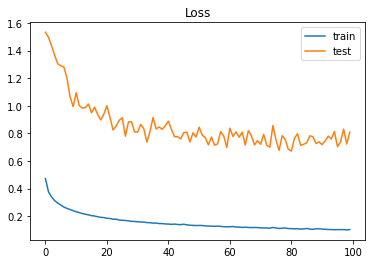

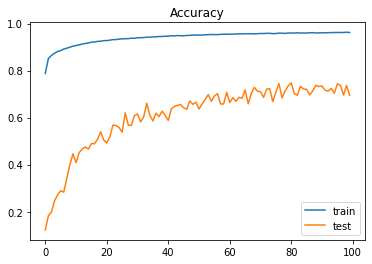

In [83]:
from matplotlib import pyplot

# evaluate the model
_, train_acc = basic_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = basic_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training

pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# plot accuracy during training
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


In [84]:
# # serialize model to JSON
# model_json = basic_model.to_json()
# with open("models/neural_network.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# basic_model.save_weights("models/neural_network.h5")
# print("Saved model to disk")